# Assessment for Fundamentals of Data Analysis

In [47]:
# import all packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("tips.csv")

In [23]:
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [25]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [26]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
(df.loc[df.loc[:, 'time'] == 'Lunch']).describe()

,total_bill,tip,size
count,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765
std,7.713882,1.205345,1.040024
min,7.510000,1.250000,1.000000
25%,12.235000,2.000000,2.000000
50%,15.965000,2.250000,2.000000
75%,19.532500,3.287500,2.000000
max,43.110000,6.700000,6.000000


In [28]:
(df.loc[df.loc[:, 'time'] == 'Dinner']).describe()

,total_bill,tip,size
count,176.000000,176.000000,176.000000
mean,20.797159,3.102670,2.630682
std,9.142029,1.436243,0.910241
min,3.070000,1.000000,1.000000
25%,14.437500,2.000000,2.000000
50%,18.390000,3.000000,2.000000
75%,25.282500,3.687500,3.000000
max,50.810000,10.000000,6.000000


In [29]:
(df.loc[df.loc[:, 'day'] == 'Sun']).describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,21.410000,3.255132,2.842105
std,8.832122,1.234880,1.007341
min,7.250000,1.010000,2.000000
25%,14.987500,2.037500,2.000000
50%,19.630000,3.150000,2.000000
75%,25.597500,4.000000,4.000000
max,48.170000,6.500000,6.000000


In [52]:
df['total_spent'] = df['total_bill'] + df['tip']
df['tip_percentage(%)'] = round((df['tip'] / df['total_spent'])*100, 2)

In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_spent,tip_percentage(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,12.80


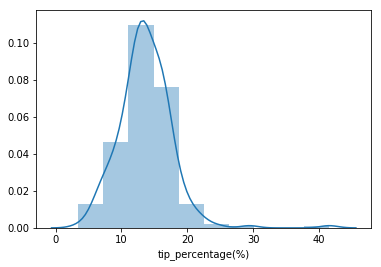

In [61]:
sns.distplot(df['tip_percentage(%)'], bins=10);


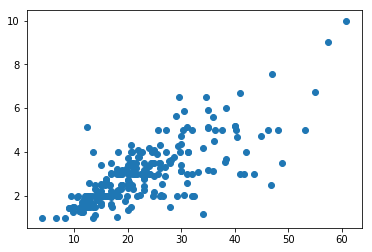

In [50]:
plt.scatter(df['total_spent'], df['tip'],)
plt.show()

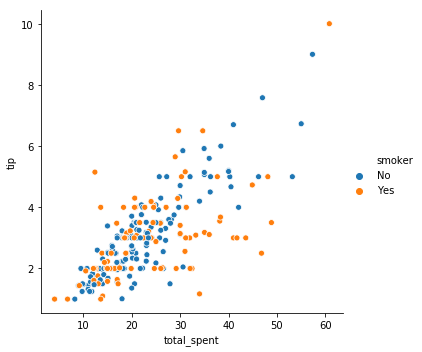

In [69]:
sns.relplot(x='total_spent', y='tip', hue="smoker", data=df)

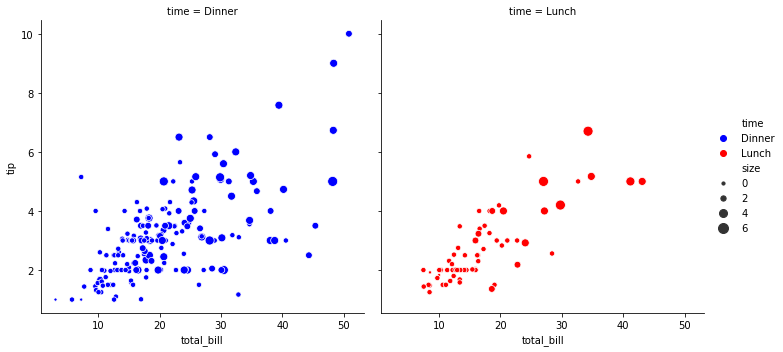

In [70]:
 g = sns.relplot(x="total_bill", y="tip", hue="time", size="size",palette=["b", "r"], sizes=(10, 100),col="time", data=df)

In [73]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

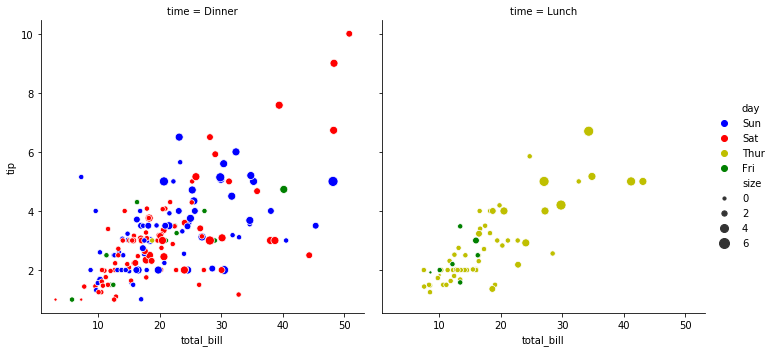

In [74]:
 g = sns.relplot(x="total_bill", y="tip", hue="day", size="size",palette=["b", "r", "y", "g"], sizes=(10, 100),col="time", data=df)